In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr 
from glob import glob
import numpy as np
import cartopy.crs as ccrs
import imageio
import cartopy.feature as cf

In [2]:
year = 2023
era5_path = 'E:/Simon/tracking/alexcrawford0927/final_version/ERA5_2023.nc'
tracking_path = r'E:/Simon/tracking/alexcrawford0927/final_version/Cressida/Cyclonetracking_ERA5_reanalysis/tracking13_2/CSVSystem/{}/*/*.csv'.format(year)
extent = [100, 150, 10, 40]
# extent = [80, 170, 0, 50]

projection =ccrs.AzimuthalEquidistant(central_longitude=125, central_latitude=25)
# ds_era = xr.open_dataset('E:/Simon/spatial analysis/tracking/era5/ERA5_1999_europe.nc')
ds_era = xr.open_dataset(era5_path)
# ds_era['longitude'] = ds_era.longitude - 180

file_list = glob(tracking_path)
dfs = [pd.read_csv(file) for file in file_list]

dfs = []
for id, file in enumerate(file_list):
    df = pd.read_csv(file)
    df['storm_id'] = id + 1
    dfs.append(df)

df_tracks = pd.concat(dfs, ignore_index=True)
df_tracks['time'] = df_tracks[['year', 'month', 'day', 'hour']].apply(lambda x: '{}-{:02d}-{:02d} {:02d}'.format(x[0], x[1], x[2], x[3]), axis=1)
df_tracks['time'] = pd.to_datetime(df_tracks['time'], format = '%Y-%m-%d %H')

# ds_era_fil = ds_era.sel(time = ds_era['time.month']== 9)
ds_era_fil = ds_era.sel(longitude = (ds_era.longitude >= extent[0]) & (ds_era.longitude < extent[1]), latitude = (ds_era.latitude >= extent[2]) & (ds_era.latitude < extent[3]))
# ds_era_fil = ds_era.copy()

lon = ds_era_fil.longitude.values
lat = ds_era_fil.latitude.values
lon, lat = np.meshgrid(lon, lat)

C:\Users\simon\AppData\Local\Temp\2\ipykernel_13668\1649022402.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_tracks['time'] = df_tracks[['year', 'month', 'day', 'hour']].apply(lambda x: '{}-{:02d}-{:02d} {:02d}'.format(x[0], x[1], x[2], x[3]), axis=1)


In [3]:
lon_bound = (df_tracks['lon'] > extent[0]) & (df_tracks['lon'] < extent[1])
lat_bound = (df_tracks['lat'] > extent[2]) & (df_tracks['lat'] < extent[3])
df_tracks_filter = df_tracks[np.logical_and(lon_bound, lat_bound)]

In [11]:
# for time in ds_era_fil.time.values[:1]:
for time in pd.date_range('2023-07-15', '2023-10-31', freq='72H'):
    print(time)
    df_current_point = df_tracks_filter.query("time == @time")
    current_id = df_current_point['storm_id'].unique()
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100, subplot_kw=dict(projection=projection), layout='constrained')
    ax.coastlines()
    ax.set_extent(extent)
    contourf = ax.contourf(lon, lat, ds_era_fil.msl.sel(time=time), 
                           transform=ccrs.PlateCarree(), 
                           cmap='viridis', 
                           levels = np.arange(97000, 103000+500, 500),
                           extend = 'both',
                           )
    plt.colorbar(contourf, label="Surface pressure (Pa)", extend='both')
    ax.scatter(df_current_point.lon.values, df_current_point.lat.values, c=df_current_point.p_cent.values, transform=ccrs.PlateCarree(), cmap = 'jet_r')
    for i, row in df_current_point.iterrows():
        lon_p = row['lon']
        lat_p = row['lat']
        p_cent = row['p_cent']
        if ~np.isnan(p_cent):
            ax.text(lon_p+0.5, lat_p+0.2, round(p_cent/100), transform=ccrs.PlateCarree())
    time_str = pd.to_datetime(time).strftime("%Y-%m-%d %H")
    ax.set_title(time_str)
    time_str = time.strftime('%Y-%m-%d %H')
    for id in current_id:
        df_current_track = df_tracks_filter.query("storm_id == @id and time <= @time")
        lon_t, lat_t = df_current_track.lon.values, df_current_track.lat.values
        ax.plot(lon_t, lat_t, transform=ccrs.PlateCarree(), ls="--", c="black")
    fig.savefig(f"fig/era5/{time_str}.jpg")
    plt.close(fig)  # Close the figure to free up memory

C:\Users\simon\AppData\Local\Temp\2\ipykernel_17376\3476809802.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  for time in pd.date_range('2023-07-15', '2023-10-31', freq='72H'):


2023-07-15 00:00:00
2023-07-18 00:00:00
2023-07-21 00:00:00
2023-07-24 00:00:00
2023-07-27 00:00:00
2023-07-30 00:00:00
2023-08-02 00:00:00
2023-08-05 00:00:00
2023-08-08 00:00:00
2023-08-11 00:00:00
2023-08-14 00:00:00
2023-08-17 00:00:00
2023-08-20 00:00:00
2023-08-23 00:00:00
2023-08-26 00:00:00
2023-08-29 00:00:00
2023-09-01 00:00:00
2023-09-04 00:00:00
2023-09-07 00:00:00
2023-09-10 00:00:00
2023-09-13 00:00:00
2023-09-16 00:00:00
2023-09-19 00:00:00
2023-09-22 00:00:00
2023-09-25 00:00:00
2023-09-28 00:00:00
2023-10-01 00:00:00
2023-10-04 00:00:00
2023-10-07 00:00:00
2023-10-10 00:00:00
2023-10-13 00:00:00
2023-10-16 00:00:00
2023-10-19 00:00:00
2023-10-22 00:00:00
2023-10-25 00:00:00
2023-10-28 00:00:00
2023-10-31 00:00:00


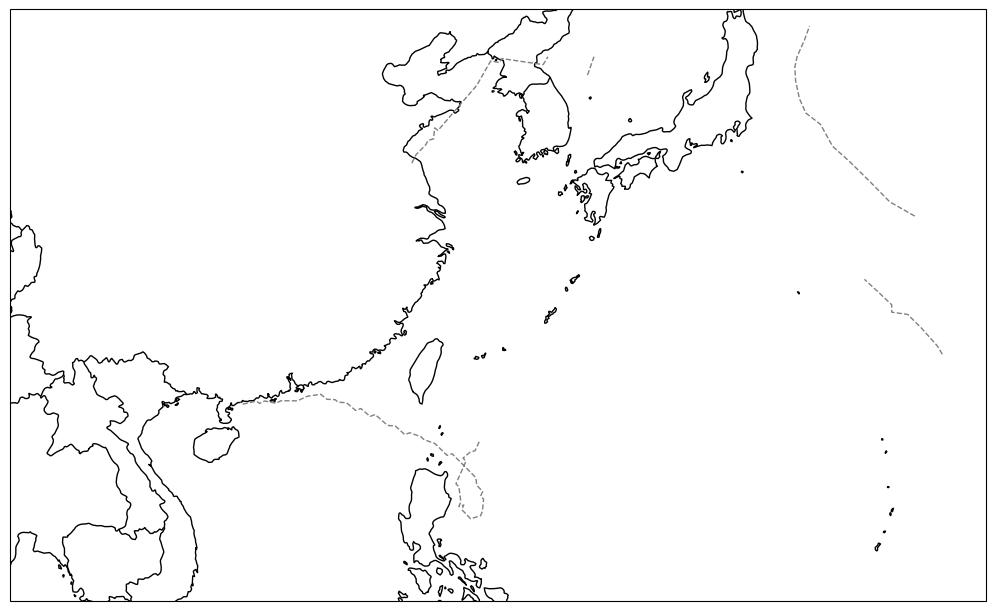

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), subplot_kw=dict(projection=projection), layout='constrained')
ax.coastlines("50m")
ax.add_feature(cf.BORDERS)
ax.set_extent(extent)

# x = [80, 170, 170, 80, 80]  # X coordinates of the boundary
# y = [0, 0, 40, 40, 0]  # Y coordinates of the boundary
# # Interpolate to create a smoother boundary
# interp_points = 1000
# x_interp = np.interp(np.linspace(0, 1, interp_points), np.linspace(0, 1, len(x)), x)
# y_interp = np.interp(np.linspace(0, 1, interp_points), np.linspace(0, 1, len(y)), y)
# ax.plot(x_interp, y_interp, color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree())  

for id in df_tracks_filter['storm_id'].unique():
        df_current_track = df_tracks_filter.query("storm_id == @id")
        lon_t, lat_t = df_current_track.lon.values, df_current_track.lat.values
        ax.plot(lon_t, lat_t, transform=ccrs.PlateCarree(), ls="--", c="gray", lw=1)

check

In [2]:
xr.open_dataset("Cressida/ERA5/SLP_EASE2_N0_25km/ERA5_EASE2_N0_25km_SLP_Hourly_202301.nc")

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 248, x: 720, y: 720)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2023-01-01 ... 2023-01-31T21:00:00
  * x        (x) float64 6kB -8.988e+06 -8.962e+06 ... 8.962e+06 8.988e+06
  * y        (y) float64 6kB 8.988e+06 8.962e+06 ... -8.962e+06 -8.988e+06
Data variables:
    msl      (time, y, x) float64 1GB ...
Attributes:
    description:  Mean sea-level pressure from ERA5. Projection specification...
    source:       netCDF4 python module